## Library

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")

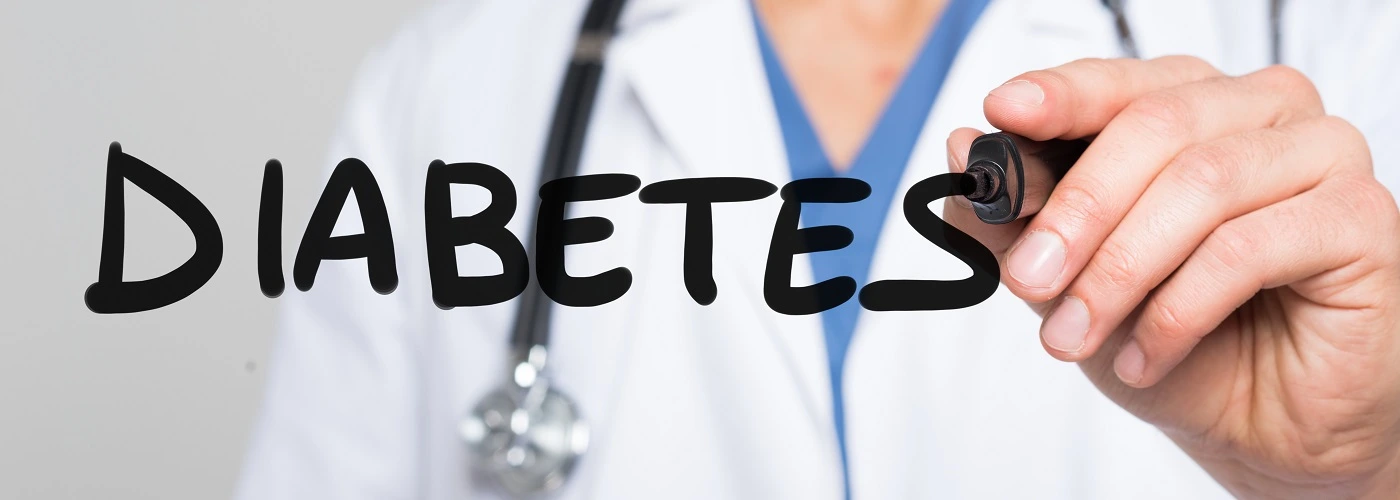

## Read DataSet

In [ ]:
diabets_df = pd.read_csv("DataSet/diabetes_DF.csv",encoding="utf8")
diabets_df = diabets_df.astype(float)
diabets_df.info()
diabets_df

In [ ]:
plt.figure(figsize=(20,20))
grid = sns.PairGrid(diabets_df,hue='Outcome',corner=True)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

In [ ]:
diabets_df.hist(column='Outcome',bins=5)
diabets_df['Outcome'].value_counts()

## Pearson correlation:
$$
r_{xy} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
$$

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(diabets_df.corr(),annot=True,cmap='YlOrBr',annot_kws={'fontsize':12})

In [ ]:
diabets_df.columns

In [ ]:
X=diabets_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
display(X[0:5])
y = diabets_df[['Outcome']].values
display(y[0:5])

### Normalize Data

In [ ]:
scale = StandardScaler().fit(X)
X = scale.transform(X.astype(float))
X[0:5]

In [ ]:
X_train, X_test ,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

In [ ]:
k=5
model = KNeighborsClassifier(n_neighbors=k).fit(X=X_train, y=y_train)

In [ ]:
y_pred = model.predict(X=X_test)

In [ ]:
y_pred.shape

In [ ]:
print(f"Train set Accuracy: { metrics.accuracy_score(y_train,model.predict(X_train)):0.3f}")
print(f"Test set Accuracy: {metrics.accuracy_score(y_test,y_pred):0.3f}")

In [ ]:
Kn=15
mean_acc = np.zeros((Kn-1))

for k in range (1,Kn):
    model = KNeighborsClassifier(n_neighbors=k).fit(X=X_train, y=y_train)
    y_pre = model.predict(X=X_test)
    
    mean_acc[k-1] = metrics.accuracy_score(y_test,y_pre)
    

In [ ]:
plt.plot(range(1,Kn),mean_acc,'k')
plt.legend(('Accuracy ', '1 std','3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print(f"The best accuracy was with : {mean_acc.max():0.3f} with k= {mean_acc.argmax()+1}")

In [ ]:
model = KNeighborsClassifier(n_neighbors=12).fit(X=X_train, y=y_train)

In [ ]:
print(f"Model Score: {model.score(X=X_test, y=y_test):0.3f}")

## Confiuse Matrix

In [ ]:
y_pred = model.predict(X=X_test)
conf = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(pd.DataFrame(conf),annot=True ,fmt='g')



In [ ]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

---
$$
\text{Accuracy} =  \frac{TP+TN}{P+N}\ = \frac {TP + TN}{TP + FP + TN + FN}\ \\
$$
$$
\text{PPV(Positve Predictive Value , Percision)} =  \frac {TP}{TP+FP}\  
$$
$$ 
\text{TPR(True Positive Rate , recall , hit rate)} = \frac {TP}{P}\ = \frac{TP}{TP+FN}\
$$
$$
F_{1}=2.\frac {PPV.TPR}{PPV+TPR}\ = \frac {2TP}{2TP+FP+FN}\
$$
---

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
precision = precision_score(y_test,y_pred)
print('percision of the binary classifier = {:0.3f}'.format(precision))
recall = recall_score(y_test, y_pred)
print('recall of the binary classifier = {:0.3f}'.format(recall))
f1 = f1_score(y_test, y_pred)
print('f1 of the binary classifier = {:0.3f}'.format(f1))